# Métodos Numéricos (2024)

## Guía 6: Integración Numérica

In [73]:
using Plots
using LaTeXStrings
#import Pkg; Pkg.add("DataFrames")
using DataFrames
using LsqFit
using LinearAlgebra

## Problema 1
1. Haciendo los calculos a mano y trabajando con 7 cifras significativas, encuentre las aproximaciones a las integrales definidas:

    a. $I_1 = \int_0^1 x^4 dx$

    b. $I_2 = \int_0^{\pi} \sin{(x)} dx$

utilizando las reglas simples de *i) punto medio*, *ii) trapecio* y *iii) Simpson*. 

2. Calcule el error absoluto y el error relativo en cada caso y para cada método.

**Teoría**

La regla simple del punto medio es:
$$
\int_a^b dx\, f(x) \approx (b-a)f\bigg(\frac{a+b}{2}\bigg)
$$

La regla simple del trapecio es:
$$
\int_a^b dx\, f(x) \approx \frac{b-a}{2}\bigg(f(a) + f(b)\bigg)
$$

La regla simple de Simpson es:
$$
\int_a^b dx\, f(x) \approx \frac{b-a}{6}\bigg(f(a) + 4f\bigg(\frac{a+b}{2}\bigg) + f(b)\bigg)
$$

In [74]:
#funciones para luego
function punto_medio(f,a,b)
    t=(b-a)*(f((a+b)/2))
    return t
end
function trapecio(f,a,b)
    t=((b-a)/2)*(f(a)+f(b))
    return t
end
function simpson(f,a,b)
    t=(b-a)/6 *(f(a)+4*(f((b+a)/2))+f(b))
    return t
end

simpson (generic function with 1 method)

In [75]:
setprecision(7) # para trabajar con esa presición  ^2
#I1
#punto medio:
I11=(1)*((1/2)^4)
#trapecio
I12=(1/2)*(sin(π)+sin(0))
#simpson
I13=(1/6)*(0+4*((1/2)^4)+(1^4))

#I2
#punto medio:
I21=(π)*(sin(π/2))
#trapecio
I22=(π/2)*(1^4)
#simpson
I23=(π/6)*(sin(0)+4*(sin(π/2))+(sin(π)))

println("I1: punto medio: $(I11), trapecio:$(I12), simpson:$(I13)")#la exacta es 0.2
println("I2: punto medio: $(I21), trapecio:$(I22), simpson:$(I23)")#la exacta es 2

I1: punto medio: 0.0625, trapecio:0.0, simpson:0.20833333333333331
I2: punto medio: 3.141592653589793, trapecio:1.5707963267948966, simpson:2.0943951023931953


In [76]:
#calculo de error
#setprecision(7)
I1=(1.0/5.0)
I2=1.0
function error1(a)
   return abs(a-I1) 
end
function error2(a)
   return abs(a-I1) 
end
#acá me compliqué un poco, pero son unas funciones que sacan el error restando lo calculado manualmente I1,I2 (valor real)
#con el valor aproximado los sacados por los metodos I11,I12,etc.
println("I1: E_punto medio: $(error1(I11)), E_trapecio:$(error1(I12)), E_simpson:$(error1(I13))")
println("I2: E_punto medio: $(error2(I21)), E_trapecio:$(error2(I22)), E_simpson:$(error2(I23))")#comparar con alguien, no se si está bien

I1: E_punto medio: 0.1375, E_trapecio:0.2, E_simpson:0.008333333333333304
I2: E_punto medio: 2.941592653589793, E_trapecio:1.3707963267948966, E_simpson:1.8943951023931953


## Problema 2

1. Repita el problema 1 dividiendo el intervalo de integración en dos subintervalos de igual tamaño. Es decir:

    a. $I_1=\int_0^{1/2} x^4 dx+ \int_{1/2}^1 x^4 dx$

    b. $I_2=\int_0^{\pi/2}\sin{(x)}dx+\int_{\pi/2}^{\pi}\sin{(x)} dx$

2. Compare resultados con lo obtenido en el problema 1.

In [77]:
#1a
#I1
f(x)=x^4
I11=punto_medio(f,0,0.5)+punto_medio(f,0.5,1)
I12=trapecio(f,0,0.5)+trapecio(f,0.5,1)
I13=simpson(f,0,0.5)+simpson(f,0.5,1)
#I2
f(x)=sin(x) #reescribo f para no tener q cambiar codigo
I21=punto_medio(f,0,π/2)+punto_medio(f,π/2,π)
I22=trapecio(f,0,π/2)+trapecio(f,π/2,π)
I23=simpson(f,0,π/2)+simpson(f,π/2,π)
#imprimo todo
println("I1: punto medio: $(I11), trapecio:$(I12), simpson:$(I13)") #salieron bien creo, la exacta es 0.2
println("I2: punto medio: $(I21), trapecio:$(I22), simpson:$(I23)") #la exacta es 2

I1: punto medio: 0.16015625, trapecio:0.28125, simpson:0.20052083333333331
I2: punto medio: 2.221441469079183, trapecio:1.5707963267948966, simpson:2.0045597549844207


## Problema 3
1. Construya funciones que dada una función arbitraria, retornen  las aproximaciones numéricas $S_M$, $S_T$ y $S_S$ a una integral de la forma
$$
I = \int_a ^b f(x) dx
$$
utilizando las reglas compuestas del *punto medio*, del *trapecio* y de *Simpson*, respectivamente.
Las funciones deben evaluar el integrando $f(x)$ en $n+1$ puntos equiespaciados $x_i$ para $i=0,1,2,...,n$ y con espaciamiento $h=(b-a)/n$.
En el caso del punto medio, se evalúa en los $x_i+h/2$ para $i=0,1,...,n-1$.

2. Calcule $S_M$, $S_T$ y $S_S$ para la integral:
$$
I = \int _0 ^1 e^{-x} dx
$$
Utilice un espaciamiento $h_1=0.05$ em ambos casos. Luego repita el procedimiento disminuyendo su 
espaciamiento a la mitad, $h_2=h_1/2=0.025$.

3. Teniendo en cuenta que es posible conocer el resultado exacto de la integral en cuestión, evalúe el error
$\varepsilon(h)=|S-I|$, para $h=0.05$ y $h=0.025$ para los tres métodos de aproximación.
Verifique que el cociente de precisión, definido como 
$$
Q = \frac{\varepsilon(h)}{\varepsilon(h/2)}
$$
toma un valor aproximado a $4$ cuando se usa la regla del *punto medio* y del *trapecio*, y un valor aproximado a $16$ cuando se usa la regla de *Simpson*. 
Teniendo en cuenta la expresión del error de truncamiento en cada caso, justifique este resultado.

**Consejo:** tener cuidado con *Simpson* en elegir siempre un número par de intervalos, i.e, un número impar de puntos. Pruebe con una integral conocida, qué resultados da cuando usa un número impar de intervalos. Incluya en la función para dicho método un chequeo de que el número de puntos sea par.

In [78]:
#3.1
function primer_generador_puntos_equispaciados(a,b,n) #tengo que hacer dos //con n intervalos
    puntos=zeros(n+1)
    h=(b-a)/n
    puntos[1]=a
    for i in 2:(n+1)
        puntos[i]= puntos[i-1]+h #vos aumentado el valor con h
    end
    return puntos
end
function segundo_generador_puntos_equispaciados(a,b,n) #solo n-1 intervalos
    puntos=zeros(n)
    h=(b-a)/(n) #es h/2
    puntos[1]=a
    for i in 2:(n)
        puntos[i]= puntos[i-1]+h #vos aumentado el valor con h
    end
    return puntos
end
     #   #generador_puntos_equispaciados(0,10,4) #funciona bien

segundo_generador_puntos_equispaciados (generic function with 1 method)

In [79]:
#como al principio ya habia armado las funciones que calcula la intergral entres dos puntos, 
#ahora solo me queda armar una funcion que las llame por pequeños intervalos (con los puntos recien generados como extremos)
#y sume los valores, para tener la integral total de la funcion elegida.
#=function S_M(f,a,b,n)#n es la cantidad de intervalos que quiero
    puntos=segundo_generador_puntos_equispaciados(a,b,n) #llamo la funcion creadora de puntos
    suma=0.0
    for i in 1:(n-1) # le resto uno para que no de error en la ultima iteración, por usar [i+1]
    suma+=punto_medio(f,puntos[i],puntos[i+1]) #voy sumando las integrales en cada intervalo
    end
    return suma
end =#
function S_m(f,a,b,n)
    h=(b-a)/n
    x=zeros(n+1)
    x[1]=a
    ls=[]
    for i in 1:n
        x[i+1]=x[i]+h
        I=punto_medio(f,x[i],x[i+1]) 
        push!(ls,I)
    end
    return sum(ls)
end
function S_T(f,a,b,n)#n es la cantidad de intervalos que quiero
    puntos=primer_generador_puntos_equispaciados(a,b,n) #llamo la funcion creadora de puntos
    suma=0.0
    for i in 1:(n) # le resto uno para que no de error en la ultima iteración, por usar [i+1]
    suma+=trapecio(f,puntos[i],puntos[i+1]) #voy sumando las integrales en cada intervalo
    end
    return suma
end
#=function S_S(f,a,b,n)#n es la cantidad de intervalos que quiero
    puntos=primer_generador_puntos_equispaciados(a,b,n) #llamo la funcion creadora de puntos
    suma=0.0
    if n%2==1
        println("es impar rey")
        return 0
    else
        for i in 1:n # le resto uno para que no de error en la ultima iteración, por usar [i+1]
        suma+=simpson(f,puntos[i],puntos[i+1]) #voy sumando las integrales en cada intervalo
        end
        return suma
    end
end =#
function S_s(f,a,b,n)
    h=(b-a)/n
    x=zeros(n+1)
    x[1]=a
    ls=[]
    if n%2==1
        return printl("nono")
    else
    end
        for i in 1:n
        x[i+1]=x[i]+h
        I = (x[i+1] - x[i])/6 * (f(x[i]) + 4 * f((x[i] + x[i+1])/2) + f(x[i+1]))
        #I=simpson(f,x[i],x[i+1])
         push!(ls,I)
    end
           return sum(ls)
end
#="                   ## otro método ##                     "
function SS(a,b,n,f)
    @assert(n%2 == 0)
    h = (b-a)/n
    sp = 0
    si = 0
    for j in 1:((n/2)-1)
        sp = sp + f(a + h*2j)
    end
     for j in 1:(n/2)
        si = si + f(a + h*(2*j-1))
    end
    I = (h/3)*(f(a)+2*sp+4*si+f(b))
    return I 
end =# # funcion  igual al otro

S_s (generic function with 1 method)

In [80]:
#3.2
#como me pide un esparcimiento de h1=0.05 -> n=20, en h2=h1/2->n=40
f(x)=exp(-1*x)
a=0.0
b=1.0
n=20
i1=S_m(f,a,b,n)
i2=S_T(f,a,b,n)
i3=S_s(f,a,b,n) #simpson tiene que usar par cantidad de intervalos
#i3=SS(a,b,20,f)
I_real=0.63212 #lo saqué de symbolab :)
println("con n=20 (o sea h=0.05)") #saco n despejando y ya
println("primer metodo: $(i1), segundo: $(i2), tercero: $(i3), valor real: $(I_real)")

#ahora hago lo mismo pero con n=40
a=0.0
b=1.0
n=40
I1=S_m(f,a,b,n)
I2=S_T(f,a,b,n)
I3=S_s(f,a,b,n) #con el metodo viejo
#I3=SS(a,b,40,f)
println("con n=40 (o sea h=0.025)")
println("primer metodo: $(I1), segundo: $(I2), tercero: $(I3), valor real: $(I_real)") 

con n=20 (o sea h=0.05)
primer metodo: 0.6320547177379595, segundo: 0.6322522451248159, tercero: 0.632120560200245, valor real: 0.63212
con n=40 (o sea h=0.025)
primer metodo: 0.6321040976557458, segundo: 0.6321534814313879, tercero: 0.632120558914293, valor real: 0.63212


In [81]:
# 3.3 saco los errores
#para n=20 (h=0.05)
e1=abs(i1-I_real)
e2=abs(i2-I_real)
e3=abs(i3-I_real)
#para n=40 (h=0.025)
E1=abs(I1-I_real)
E2=abs(I2-I_real)
E3=abs(I3-I_real)
#ahora los cociente de presicion
Q1=e1/E1 #con punto medio
Q2=e2/E2 #con trapecio
#Q3=e3/E3 #con simpson
Q3=(abs(-f(1)+f(0)-i3))/(abs(-f(1)+f(0)-I3)) # no se porque con este si da casi 16
println("Q1: $(Q1); Q2: $(Q2); Q3: $(Q3)") 

Q1: 4.105197384548383; Q2: 3.9498049914196818; Q3: 15.999094835121433


## Problema 4
1. Para los métodos de integración numérica del problema 3, implemente fórmulas de estimación del error en función de el número de puntos $n$, una cota máxima $M$ asociada a $f(x)$ o alguna de sus derivadas, y los extremos $a$ y $b$ del intérvalo de integración.

2. Indique, para cada método, el mínimo $n$ necesario para alcanzar un error relativo menor a $10^{-7}$ de las siguientes integrales

    a. $\int_0^{1/2} \frac{2}{x-4} \; dx$

    b. $\int_1^{3/2} x^2 \log x \; dx$

3. Compruebe usando los métodos del problema 3 si las estimaciones de $n$ son adecuadas.

In [82]:
# Función para estimar el error del método del punto medio
function error_punto_medio(a, b, n, M)
    return (b - a)^3 / (24 * n^2) * M
end
# Función para estimar el error del método del trapecio
function error_trapecio(a, b, n, M)
    return (b - a)^3 / (12 * n^2) * M
end
# Función para estimar el error del método de Simpson
function error_simpson(a, b, n, M)
    return (b - a)^5 / (180 * n^4) * M
end

error_simpson (generic function with 1 method)

In [83]:
#por teorico, para sacar el error, necesitamos varias derivadas de las funciones:
f1(x)=2/(x-4)
f2(x)=(x^2)*log(x) # las funciones
#voy a necesitar sus derivadas 2das y 4tas
f12(x)= 4/(x-4)^3 #derivad 2da de primer función
f14(x)=48/(x-4)^5 #derivada 4ta
f22(x)=2*log(x)+3 #derivas 2da y cuarta de segunda función
f24(x)=-2/(x^2)

#las funciones integradas
F1(x)=2*log(4-x)
F2(x)=((x^3)*(3*log(x)-1))/9

F2 (generic function with 1 method)

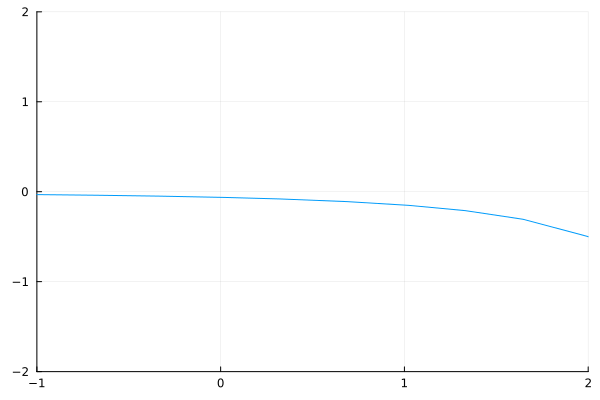

In [84]:
#vamos a encontrar las cotas, usando gráficos de las derivadas 2das y 4ta 
#primera función:
plot(f12,label="")
xlims!(-1,2)
ylims!(-2,2)

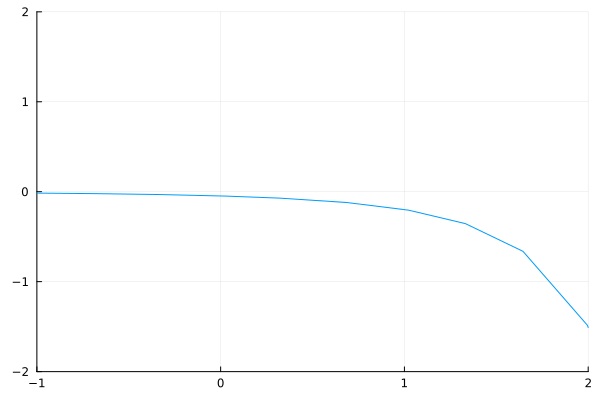

In [85]:
plot(f14,label="")
xlims!(-1,2)
ylims!(-2,2)

In [86]:
#vemos que cero es cota para la derivada segunda y cuarta
#la integral es entre 0 y 0.5, y como son decrecientes en ese intervalo, tomamos como cota el valor al inicio del intervalo
M_puntomedio=f12(0)#los metodos usan distintas cotas
M_trapecio=f12(0)
M_simpson=f14(0)
a=0.0
b=0.5
n=30 #fui probando ns hasta que me dio errores E-7,entonces el minimo n es 30
error_pm = error_punto_medio(a, b, n, M_puntomedio)
error_tr = error_trapecio(a, b, n, M_trapecio)
error_simp = error_simpson(a, b, n, M_simpson)

println("Error del método del punto medio: $error_pm")
println("Error del método del trapecio: $error_tr")
println("Error del método de Simpson: $error_simp")


Error del método del punto medio: -3.616898148148148e-7
Error del método del trapecio: -7.233796296296296e-7
Error del método de Simpson: -1.0046939300411523e-11


In [87]:
#4.c, veremos si ese n basta
f1(x)=2/(x-4)
n=30
a=0
b=1/2
If11=S_m(f1,a,b,n)
If12=S_T(f1,a,b,n)
If13=S_s(f1,a,b,n)
#caluclo del valor real:
F1(x)=2*log(4-x)
I_real=F1(0)-F1(1/2)
println("con metodos sm; $If11 , st: $I12 , ss: $I13, El $I_real")
#vemos que se acercan bastante al numero real

con metodos sm; -0.26706234236666065 , st: 0.28125 , ss: 0.20052083333333331, El 0.26706278524904503


In [88]:
"ahora lo mismo para la segunda función, buscamos el n adecuado luego de encontrar la cota M para las derivadas 2da y 4ta"


"ahora lo mismo para la segunda función, buscamos el n adecuado luego de encontrar la cota M para las derivadas 2da y 4ta"

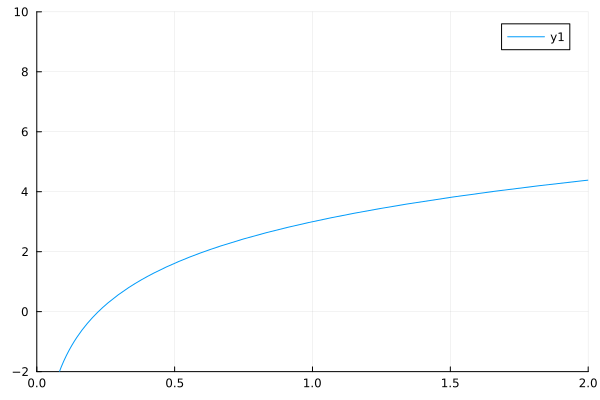

In [89]:
plot(f22)
xlims!(0,2)
ylims!(-2,10)

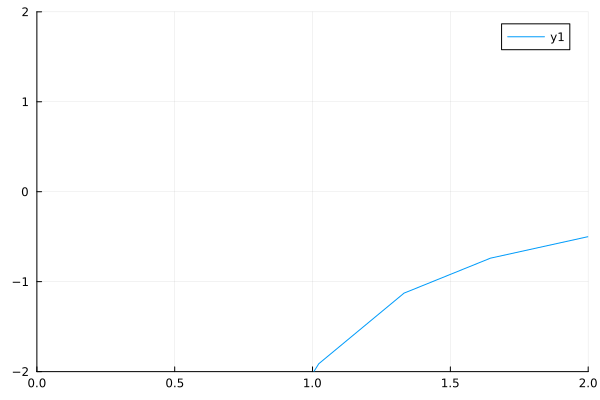

In [90]:
plot(f24)
xlims!(0,2)
ylims!(-2,2)

In [91]:
"vemos que las derivadas son crecientes, por lo tanto, como se integran en 1 a 1.5, su cota será la func evaluada allí"
M_puntomedio=f22(3/2)#los metodos usan distintas cotas
M_trapecio=f22(3/2)
M_simpson=f24(3/2)
a=1.0
b=1.5
n=200 #fui probando ns hasta que me dio errores E-7,entonces el minimo n es 200 D:
error_pm = error_punto_medio(a, b, n, M_puntomedio)
error_tr = error_trapecio(a, b, n, M_trapecio)
error_simp = error_simpson(a, b, n, M_simpson)

println("Error del método del punto medio: $error_pm")
println("Error del método del trapecio: $error_tr")
println("Error del método de Simpson: $error_simp")

Error del método del punto medio: 4.962148719031678e-7
Error del método del trapecio: 9.924297438063356e-7
Error del método de Simpson: -9.645061728395061e-14


In [92]:
f2(x)=(x^2)*log(x) # la 2da funcion
F2(x)=((x^3)*(3*log(x)-1))/9

n=200
a=0
b=1/2
If21=S_m(f2,a,b,n)
If22=S_T(f2,a,b,n)
If23=S_s(f2,a,b,n)
#caluclo del valor real:
I_real=F2(3/2)-F2(1)
println("con metodos sm; $If11 , st: $I12 , ss: $I13, El real $I_real")
#vemos que se acercan bastante al numero real, no se porq da negativo uno
##x = log2(4096)
#println("El valor de x es: ", x)

con metodos sm; -0.26706234236666065 , st: 0.28125 , ss: 0.20052083333333331, El real 0.19225935773279604


In [93]:
#=function ESM(a,b,M,n)
    h = (b-a)/(n+2)
    e = ((b-a)/6)*(h^2)*M 
    return e
end
function EST(a,b,M,n)
    h = (b-a)/n
    e = ((b-a)/12)*(h^2)*M 
    return e
end
function ESS(a,b,M,n)
    h = (b-a)/n
    e = ((b-a)/180)*(h^4)*M 
    return e 
end=#



#= Ejemplo de uso
a = 0.0
b = 1.0
n = 10
M_punto_medio = 1.0  # Supongamos que esta es la cota máxima de |f''(x)|
M_trapecio = 1.0     # Supongamos que esta es la cota máxima de |f''(x)|
M_simpson = 1.0      # Supongamos que esta es la cota máxima de |f^{(4)}(x)|

error_pm = error_punto_medio(a, b, n, M_punto_medio)
error_tr = error_trapecio(a, b, n, M_trapecio)
error_simp = error_simpson(a, b, n, M_simpson)

println("Error del método del punto medio: $error_pm")
println("Error del método del trapecio: $error_tr")
println("Error del método de Simpson: $error_simp")=#

## Problema 5
**Comparación de métodos.**

1. Aproxime la integral
\begin{equation*}
I = \int_0^1 e^{-t} dt = 1 - e^{-1}  \nonumber              
\end{equation*}
empleando los algoritmos del problema 3.

2. Calcule el error relativo $E$ para $n\in [2,4,8,...,4096]$ ($n=2^i$ con $i=1,2,...$) y grafique $E$ vs $n$ en *log-log*.


3. Verifique visualmente que se satisfacen leyes de potencia
$$
E = Cn^{-\alpha}
$$
y estime visualmente los valores de $C>0$ y $\alpha>0$.

4. Use el gráfico para estimar, para cada método, el mínimo $n$ al cuál se alcanza una precisión $E<10^{-7}$.

5. Repita los incisos anteriores en `Float16` y `Float32`.

6. Determine si el error de redondeo es relevante en estos casos.

In [94]:
#5.1
f(x)=exp(-x)
a=0
b=1
n=100 # cambio valores
I1=S_m(f,a,b,n)
I2=S_T(f,a,b,n)
I3=S_s(f,a,b,n)
I_real=1-exp(-1)-1+exp(0) #la integral analitica en 1 y 0
println("con metodos sm; $I1 , st: $I2 , ss: $I3, El real $I_real")

con metodos sm; 0.6321179250005782 , st: 0.6321258264911018 , ss: 0.6321205588307524, El real 0.6321205588285577


In [95]:
#5.2 calculo los errores relativos
"vectores donde guardo los errores rel de cada metodo"
errores_sm=zeros(12)
errores_t=zeros(12)
errores_ss=zeros(12)
indice=zeros(12)
##datos a usar
a=0
b=1
f(x)=exp(-x)
I_real=1-exp(-1)-1+exp(0) #el valor verdadero de la integral
## 
for i in 1:12
    n=2^i
    I1=S_m(f,a,b,n)
    I2=S_T(f,a,b,n)
    I3=S_s(f,a,b,n)

    errores_sm[i]= abs(I1-I_real)/abs(I_real) #cargo los errores relativos de cada método
    errores_t[i] = abs(I2-I_real)/abs(I_real) #de acuerdo a su n
    errores_ss[i]= abs(I3-I_real)/abs(I_real)
    indice[i]=n
end
#pongo todo en una tabla
data=DataFrame(n=indice,ErrorRel_SM=errores_sm,ErrorRel_T=errores_t,ErrorRel_SS=errores_ss) 

12×4 DataFrame
 Row │ n        ErrorRel_SM  ErrorRel_T  ErrorRel_SS 
     │ Float64  Float64      Float64     Float64     
─────┼───────────────────────────────────────────────
   1 │     2.0  0.0103412    0.020747    2.1541e-5
   2 │     4.0  0.00259943   0.00520292  1.35382e-6
   3 │     8.0  0.000650745  0.00130174  8.47316e-8
   4 │    16.0  0.000162742  0.0003255   5.29757e-9
   5 │    32.0  4.06889e-5   8.13789e-5  3.31128e-10
   6 │    64.0  1.01725e-5   2.0345e-5   2.06959e-11
   7 │   128.0  2.54313e-6   5.08626e-6  1.29267e-12
   8 │   256.0  6.35783e-7   1.27157e-6  8.13189e-14
   9 │   512.0  1.58946e-7   3.17891e-7  4.5665e-15
  10 │  1024.0  3.97364e-8   7.94729e-8  3.51269e-16
  11 │  2048.0  9.93411e-9   1.98682e-8  3.51269e-16
  12 │  4096.0  2.48353e-9   4.96705e-9  7.02539e-16

In [109]:
# Definir el modelo de ajuste
model(x, p) = p[1] * x .^ p[2]

# Ajuste usando LsqFit
initial_params = [1.0, -1.0]  # Valores iniciales para C y -a

fit_sm = curve_fit(model, indice, errores_sm, initial_params)
C1, exponent1 = fit_sm.param #los parametros ajustados :D

fit_t = curve_fit(model, indice, errores_t, initial_params)
C2, exponent2 = fit_t.param

fit_ss = curve_fit(model, indice, errores_ss, initial_params)
C3, exponent3 = fit_ss.param

#= Graficar el error relativo vs. n y el ajuste de la curva
scatter(indice, errores_sm, label="Datos", xlabel="n (particiones)", ylabel="Error relativo", title="Error relativo vs. n (Método del punto medio)", xscale=:log10, yscale=:log10)
plot!(x -> C * x^exponent, minimum(indice):0.1:maximum(indice), label="recta del ajuste")
=#
# Mostrar los resultados del ajuste
println("C_punto medio: ", C1,", a_punto medio: ", -exponent1)
println("C_trapecio: ", C2,", a_trapecio: ", -exponent2)
println("C_simpson: ", C3,", a_simpson: ", -exponent3)

C_punto medio: 0.04116174996417098, a_punto medio: 1.992875244969573
C_trapecio: 0.08275526802084711, a_trapecio: 1.995931851522767
C_simpson: 0.0003427556033715807, a_simpson: 3.992024869023496


In [122]:
g=1.0e-7

1.0e-7

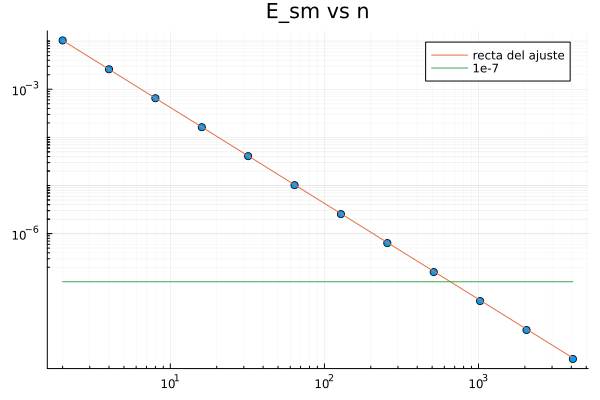

In [124]:
#"grafico error vs n en loglog"
scatter(indice,errores_sm,label="",title="E_sm vs n")
scatter!(yscale=:log10,xscale=:log10, minorgrid=true)
plot!(x -> C1 * x^exponent1, minimum(indice):0.1:maximum(indice), label="recta del ajuste")
plot!(x->g,label="1e-7")#muestro en el grafico dónde está 10^-7
#ylims!(1e-5, 1e+0)

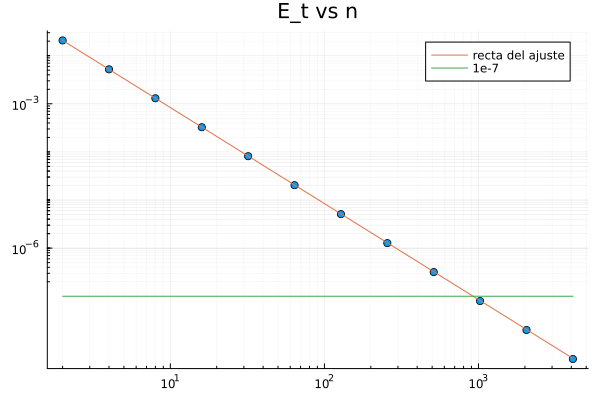

In [125]:
#"grafico error vs n en loglog"
scatter(indice,errores_t,label="",title="E_t vs n")
scatter!(yscale=:log10,xscale=:log10, minorgrid=true)
plot!(x -> C2 * x^exponent2, minimum(indice):0.1:maximum(indice), label="recta del ajuste")
plot!(x->g,label="1e-7")#muestro en el grafico dónde está 10^-7

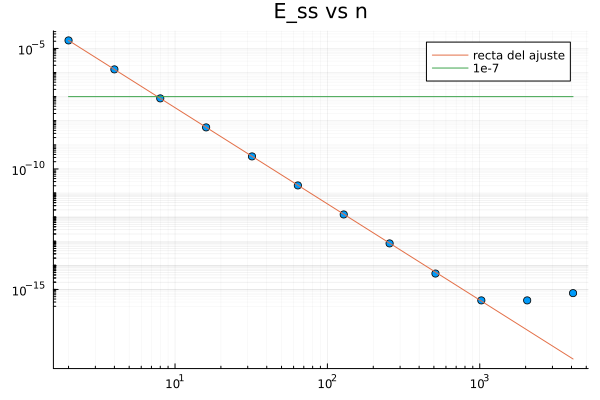

In [127]:
#"grafico error vs n en loglog"
scatter(indice,errores_ss,label="",title="E_ss vs n")
scatter!(yscale=:log10,xscale=:log10, minorgrid=true)
plot!(x -> C3 * x^exponent3, minimum(indice):0.1:maximum(indice), label="recta del ajuste")
plot!(x->g,label="1e-7")#muestro en el grafico dónde está 10^-7

## Conclusiones para 5.4
 Vemos que con el metodo de SM, se requiere al menos un n=1e3 para poder tener un error menor a 10^-7
 Con el método de Trapecio, al menos un n=1e3
 Cambia con el método de Simpson, donde solo necestia un n=10

In [128]:
#5.5 ni idea

In [129]:
#5.6 ni idea

## Problema 6
En el repositorio se encuentran dos archivos de datos, 

    mediciones1-c1-g6.dat 
    mediciones2-c1-g6.dat

Los mismos almacenan mediciones de una función $f(t)$ sobre un mismo rango de $t$. El primero muestrea $n=629$ puntos y el segundo $n=10001$.

1. Baje y grafique los datos.

2. Copie y modifique los algoritmos del problema 3 para integrar muestreos de funciones.

3. Integre los muestreos y compare.

# Ejercicios Complementarios

## Problema C.1
Idem problema 4, para las siguientes integrales: 
1. $\int_{1/2}^1 x^4 dx$
2. $\int_0^{\pi/4} x \sin x dx$

**Teoría:** Para los metodos de punto medio y trapecio el error es $\mathcal{O}(h^2)$ y está acotado por (en término de n):

$$
E_T = \frac{(b-a)^3}{12n^2}M_2 \;\;\;\;\;\;\; E_M = \frac{(b-a)^3}{24n^2}M_2,
$$

donde 
$$
M_2 = \max_{x \in [a,b]}\{|f''(x)|\}
$$

Para el método de Simpson el error es $\mathcal{O}(h^4)$ está acotado por 

$$
E_S = \frac{(b-a)^5}{180n^4}M_4 
$$

donde 
$$
M_4 = \max_{x \in [a,b]}\{|f^{(4)}(x)|\}
$$


## Problema C.2
**Integración numérica en dos dimensiones**
1. Haga un programa que integre funciones en la region $a\le x \le b\,;\;c \le y \le d$ siguiendo el código delineado en la clase teórica, usando el método de cuadratura de Simpson en cada coordenada.
2. Evalue nume
ricamente con no menos de 8 cifras significativas las integrales
$$
\int_0^2\,dx\, \int_0^1\,dy\, e^{-x\,y} \;\;\;\;\;\;\;\;\;\;\;\;\;\;
\int_{7/5}^2\,dx\, \int_1^{3/2}\,dy\, \ln{(x+2 y)}
$$
3. Modifique el programa para permitir que los límites de integración en $y$ sean función de $x$ y evalue la integral
$$
\int_0^1\,dx\, \int_0^{\sqrt{1-x^2}}\,dy\, e^{-x\,y} 
$$